In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
data = data.drop('Date',axis = 1)

In [5]:
data.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

### Let's fill the null values accordingly

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [7]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].fillna(data[i].mode()[0])
    elif data[i].dtypes == "float64" or "int64":
        data[i] = data[i].fillna(data[i].mean())

In [8]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Visualization for categorical data

The value counts for Location is

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 



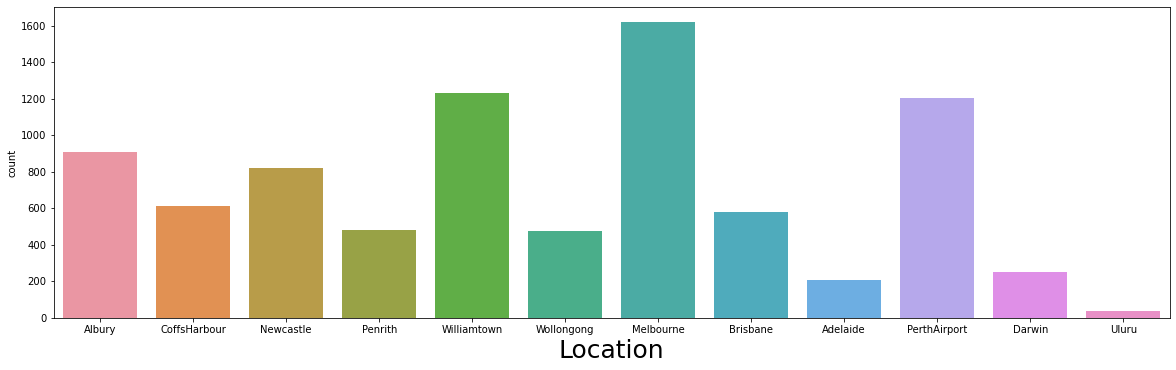

The value counts for WindGustDir is

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64 



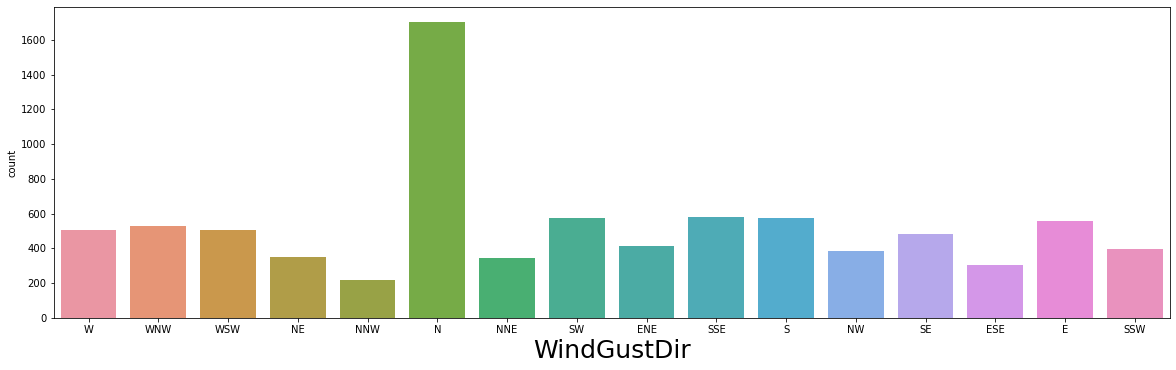

The value counts for WindDir9am is

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64 



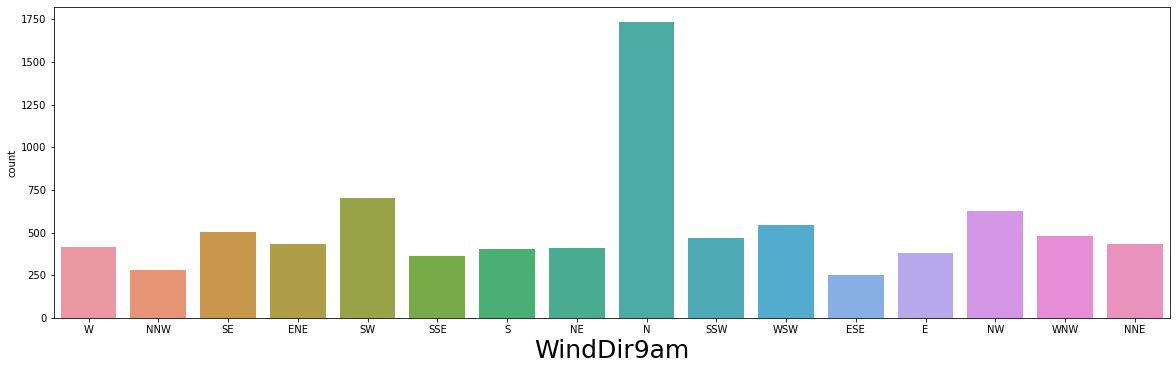

The value counts for WindDir3pm is

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64 



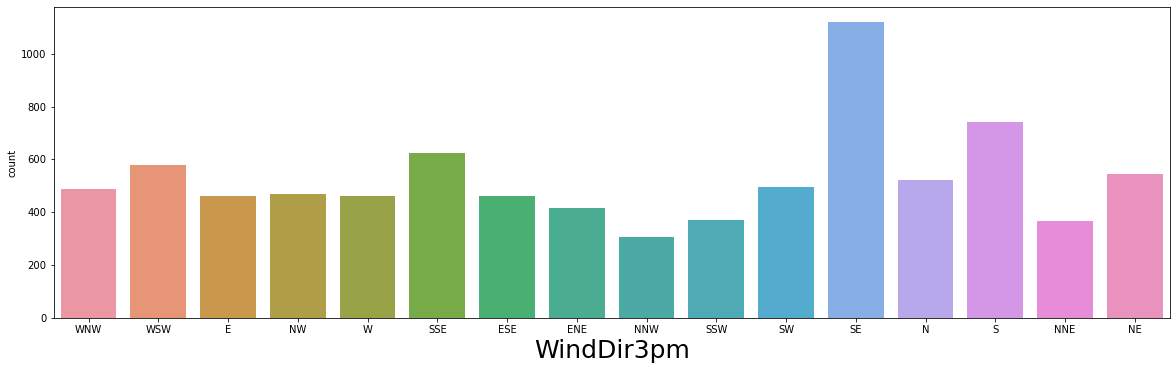

The value counts for RainToday is

No     6435
Yes    1990
Name: RainToday, dtype: int64 



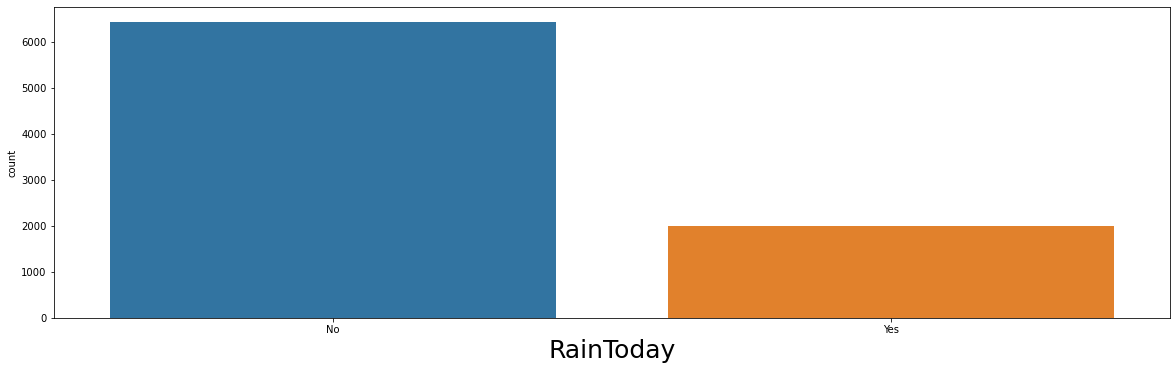

The value counts for RainTomorrow is

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64 



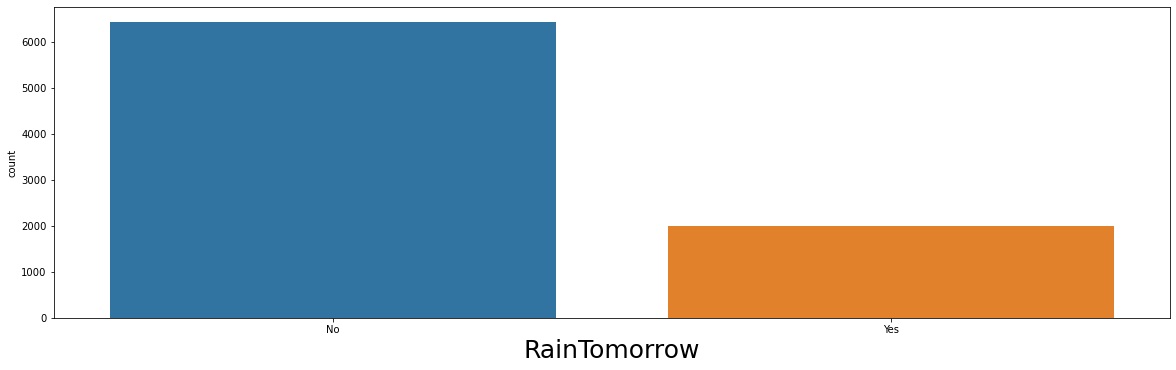

In [10]:
data_cat = data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]

plotnumber = 1
for column in data_cat :
    plt.figure(figsize = (20,40))
    if plotnumber <=6:
        ax = plt.subplot(6,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

## Visualization for continuous data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [12]:
data_cont = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                  'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

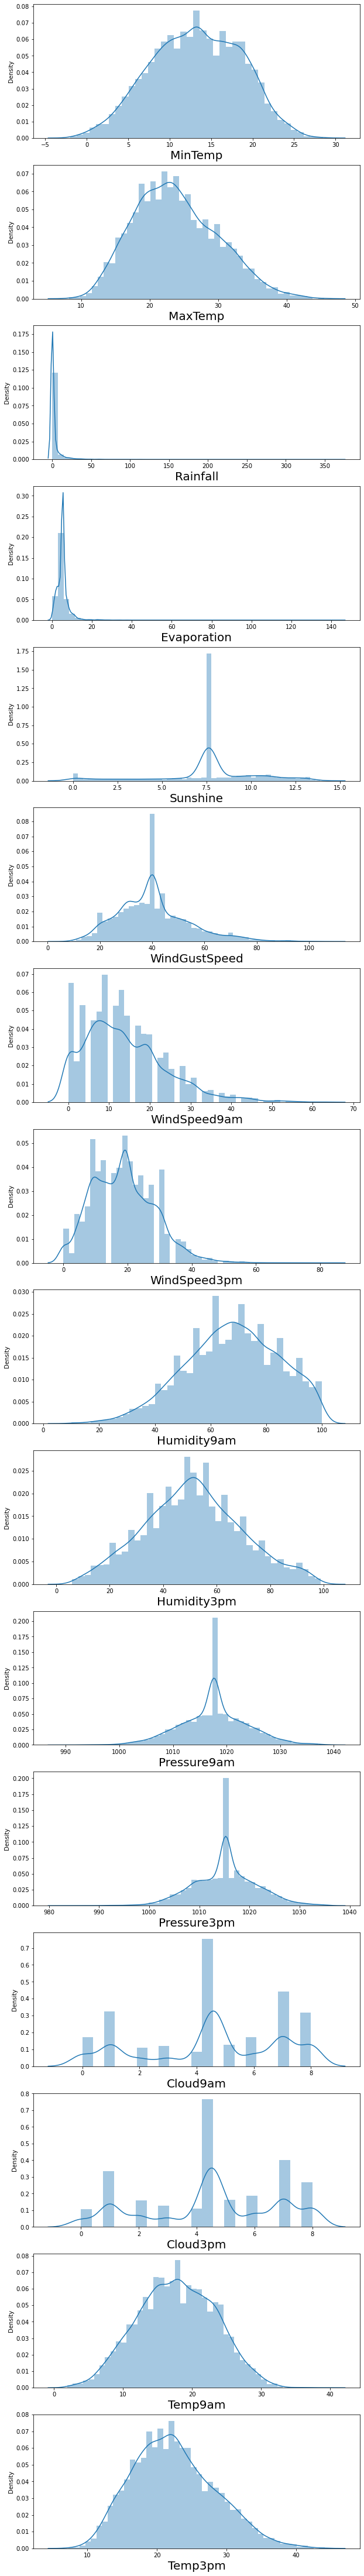

In [13]:
plt.figure(figsize = (10,80))
plotnumber = 1

for i in data[data_cont] :
    if plotnumber <=16 :
        ax = plt.subplot(16,1,plotnumber)
        sns.distplot(data[data_cont][i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

In [14]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [15]:
data[data_cont] = scaler.fit_transform(data[data_cont].values)
data[data_cont]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.041124,-0.077141,0.534236,0.195503,-0.082709,0.380260,0.717901,0.614414,0.154357,-1.646951,-1.578925,-1.307581,1.452968,-0.016506,-0.146566,-0.027218
1,-1.076281,0.280346,-0.698529,0.195503,-0.082709,0.380260,-0.990902,0.427141,-1.396996,-1.463657,-1.121066,-1.195423,-0.027810,-0.016506,-0.093095,0.385262
2,-0.051713,0.374368,-0.698529,0.195503,-0.082709,0.515699,0.638532,0.796788,-1.708910,-1.165434,-1.594687,-1.051163,-0.027810,-1.094761,0.581022,0.207145
3,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-1.265782,-0.090148,-0.967416,-1.343706,-2.025863,-0.009847,-0.393155,-0.027810,-0.016506,0.067087,0.727144
4,0.800894,1.327005,0.888946,0.195503,-0.082709,0.169468,-0.554287,0.234391,0.844633,-0.990253,-1.089435,-1.483748,1.013885,1.547621,0.013732,1.194459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-1.940226,0.005955,-0.698529,0.195503,-0.082709,-0.614550,0.111309,-0.724853,-1.016647,-1.524359,1.109921,0.814010,-0.027810,-0.016506,-1.370995,0.074321
8421,-1.789278,0.311844,-0.698529,0.195503,-0.082709,-1.473608,0.111309,-0.967416,-0.735026,-1.708882,0.933391,0.620561,-0.027810,-0.016506,-1.225512,0.417111
8422,-1.450841,0.558307,-0.698529,0.195503,-0.082709,-0.127602,-0.310018,-0.967416,-0.904954,-1.524359,0.532972,0.250106,-0.027810,-0.016506,-0.935822,0.666322
8423,-1.001521,0.573398,-0.698529,0.195503,-0.082709,-0.880853,0.111309,-1.226716,-1.016647,-1.524359,0.277277,0.201817,-0.673160,-1.094761,-0.468260,0.651027


In [16]:
data.skew()

MinTemp         -0.102983
MaxTemp         -0.010591
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
dtype: float64

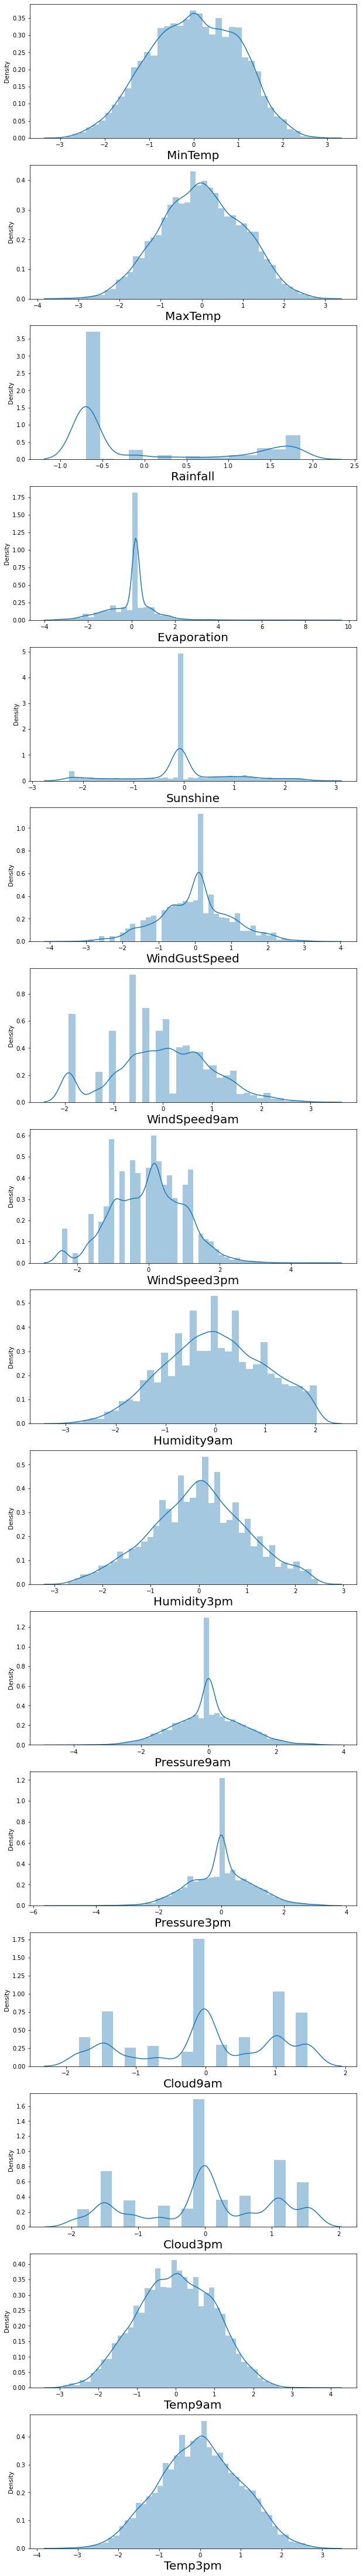

In [17]:
plt.figure(figsize = (10,80))
plotnumber = 1

for i in data[data_cont] :
    if plotnumber <=16 :
        ax = plt.subplot(16,1,plotnumber)
        sns.distplot(data[data_cont][i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

### We have removed skewness and data looked clean and continuous data looks normally distributed 
## Encoding categorical data

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [19]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,0.041124,-0.077141,0.534236,0.195503,-0.082709,13.0,0.380260,13.0,14.0,...,0.154357,-1.646951,-1.578925,-1.307581,1.452968,-0.016506,-0.146566,-0.027218,0.0,0.0
1,1.0,-1.076281,0.280346,-0.698529,0.195503,-0.082709,14.0,0.380260,6.0,15.0,...,-1.396996,-1.463657,-1.121066,-1.195423,-0.027810,-0.016506,-0.093095,0.385262,0.0,0.0
2,1.0,-0.051713,0.374368,-0.698529,0.195503,-0.082709,15.0,0.515699,13.0,15.0,...,-1.708910,-1.165434,-1.594687,-1.051163,-0.027810,-1.094761,0.581022,0.207145,0.0,0.0
3,1.0,-0.740202,0.722385,-0.698529,0.195503,-0.082709,4.0,-1.265782,9.0,0.0,...,-1.343706,-2.025863,-0.009847,-0.393155,-0.027810,-0.016506,0.067087,0.727144,0.0,0.0
4,1.0,0.800894,1.327005,0.888946,0.195503,-0.082709,13.0,0.169468,1.0,7.0,...,0.844633,-0.990253,-1.089435,-1.483748,1.013885,1.547621,0.013732,1.194459,0.0,0.0


### Checking correlation of features with target (RainTomorrow)

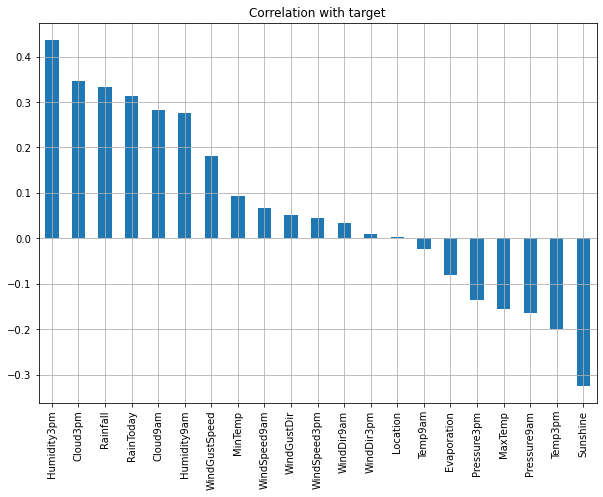

In [20]:
corr = data.drop('RainTomorrow', axis = 1).corrwith(data.RainTomorrow).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

In [21]:
data = data.drop('Location',axis = 1)

- Humidity has the highest positive correlation while sunshine has the highest negative correlation
- Appearance of cloud in the afternoon (3pm) has second highest positive correlation followed by the amount of rainfall

## 1. Model building - Rain tomorrow

In [22]:
x = data.drop('RainTomorrow', axis = 1)
y = data.RainTomorrow

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

In [26]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    bg.fit(x_train,y_train)
    y_train_pred = bg.predict(x_train)
    y_test_pred = bg.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.99002849002849
At random state 0, the testing accuracy is : 0.8827717133364974

At random state 1, the training accuracy is : 0.9914529914529915
At random state 1, the testing accuracy is : 0.8732795443758898

At random state 2, the training accuracy is : 0.9906616017727129
At random state 2, the testing accuracy is : 0.878500237304224

At random state 3, the training accuracy is : 0.9901867679645457
At random state 3, the testing accuracy is : 0.8685334598955862

At random state 4, the training accuracy is : 0.9871794871794872
At random state 4, the testing accuracy is : 0.889890840056953

At random state 5, the training accuracy is : 0.9893953782842672
At random state 5, the testing accuracy is : 0.8709065021357381

At random state 6, the training accuracy is : 0.9903450459006015
At random state 6, the testing accuracy is : 0.8789748457522544

At random state 7, the training accuracy is : 0.9892371003482114
At random state 7, the testin

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 11)
bg.fit(x_train, y_train)

BaggingClassifier()

In [28]:
y_test_pred = bg.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 88.09 %


## Cross Validation

In [29]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,15):
    cv_score = cross_val_score(bg,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 80.9259 and accuracy for testing = 88.0873

At cv = 3,cv_score = 81.2351 and accuracy for testing = 88.0873

At cv = 4,cv_score = 82.4334 and accuracy for testing = 88.0873

At cv = 5,cv_score = 84.5816 and accuracy for testing = 88.0873

At cv = 6,cv_score = 84.9502 and accuracy for testing = 88.0873

At cv = 7,cv_score = 85.3532 and accuracy for testing = 88.0873

At cv = 8,cv_score = 87.0390 and accuracy for testing = 88.0873

At cv = 9,cv_score = 87.8344 and accuracy for testing = 88.0873

At cv = 10,cv_score = 88.7492 and accuracy for testing = 88.0873

At cv = 11,cv_score = 88.6762 and accuracy for testing = 88.0873

At cv = 12,cv_score = 88.8079 and accuracy for testing = 88.0873

At cv = 13,cv_score = 88.7485 and accuracy for testing = 88.0873

At cv = 14,cv_score = 89.1140 and accuracy for testing = 88.0873



In [30]:
cv_score = cross_val_score(bg,x_scaled,y,cv = 12)
cv_mean = cv_score.mean()
cv_mean

0.8860591360591362

## Hyperparameter tuning

### BaggingClassifier

In [31]:
param_grid = {'n_estimators':[3,5,6,7,8],
               'max_samples':[0.7],
               'random_state':[10]}
gridsearch = GridSearchCV(estimator = bg, param_grid = param_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_samples': [0.7], 'n_estimators': [3, 5, 6, 7, 8],
                         'random_state': [10]})

In [32]:
gridsearch.best_params_

{'max_samples': 0.7, 'n_estimators': 8, 'random_state': 10}

In [33]:
bg = BaggingClassifier(n_estimators = 8, max_samples = 0.7, random_state = 10)

In [34]:
bg.fit(x_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=8, random_state=10)

In [35]:
y_pred = bg.predict(x_test)
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

In [36]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[1577,   55],
       [ 207,  268]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1632
         1.0       0.83      0.56      0.67       475

    accuracy                           0.88      2107
   macro avg       0.86      0.77      0.80      2107
weighted avg       0.87      0.88      0.87      2107



In [38]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [39]:
print('Threshold =',thresholds)
print('True positive rate =',tpr)
print('False positive rate =',fpr)

Threshold = [2. 1. 0.]
True positive rate = [0.         0.56421053 1.        ]
False positive rate = [0.         0.03370098 1.        ]


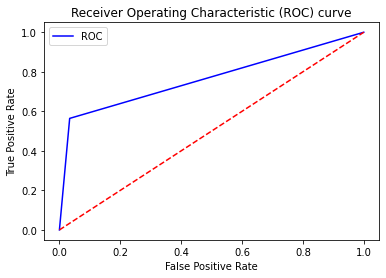

In [40]:
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

In [41]:
# Area Under the Curve AUC)

auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7652547729618163

## 2. Model building - Rainfall (Regression problem)

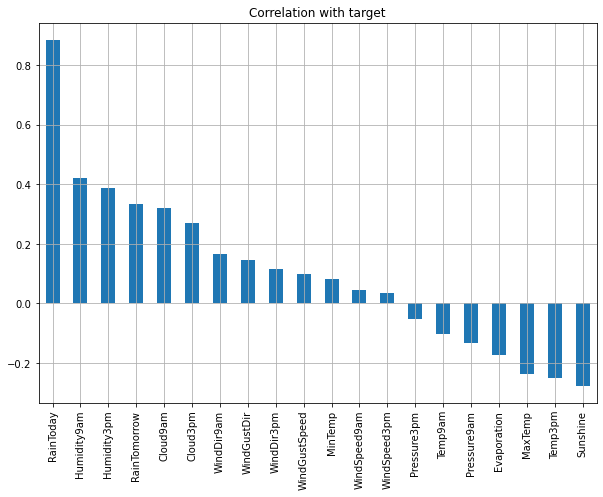

In [42]:
# Correlation of features with the target variable

corr = data.drop('Rainfall', axis = 1).corrwith(data.Rainfall).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

In [43]:
x = data.drop('Rainfall', axis = 1)
y = data.Rainfall

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svr = SVR()

In [46]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9768277078546521
At random state 0, the testing accuracy is : 0.8837535503128396

At random state 1, the training accuracy is : 0.9763213910218275
At random state 1, the testing accuracy is : 0.8765226183976446

At random state 2, the training accuracy is : 0.976181341811885
At random state 2, the testing accuracy is : 0.8853756617436149

At random state 3, the training accuracy is : 0.9777367507302509
At random state 3, the testing accuracy is : 0.8728136160453738

At random state 4, the training accuracy is : 0.9799073018728889
At random state 4, the testing accuracy is : 0.8756863145874505

At random state 5, the training accuracy is : 0.9793442991953689
At random state 5, the testing accuracy is : 0.8765130786945393

At random state 6, the training accuracy is : 0.9788094306519868
At random state 6, the testing accuracy is : 0.8911175041161229

At random state 7, the training accuracy is : 0.9795533685476083
At random state 7, the tes

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 6)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
y_test_pred = xgb.predict(x_test)
print(f"The accuracy score is {r2_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 89.11 %


### Cross Validation

In [50]:
test_acc = r2_score(y_test,y_test_pred)

for i in range (2,15):
    cv_score = cross_val_score(xgb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 76.8190 and accuracy for testing = 89.1118

At cv = 3,cv_score = 81.3263 and accuracy for testing = 89.1118

At cv = 4,cv_score = 76.9105 and accuracy for testing = 89.1118

At cv = 5,cv_score = 82.2833 and accuracy for testing = 89.1118

At cv = 6,cv_score = 83.7249 and accuracy for testing = 89.1118

At cv = 7,cv_score = 85.1635 and accuracy for testing = 89.1118

At cv = 8,cv_score = 85.4538 and accuracy for testing = 89.1118

At cv = 9,cv_score = 87.2085 and accuracy for testing = 89.1118

At cv = 10,cv_score = 88.4149 and accuracy for testing = 89.1118

At cv = 11,cv_score = 88.8119 and accuracy for testing = 89.1118

At cv = 12,cv_score = 89.0710 and accuracy for testing = 89.1118

At cv = 13,cv_score = 88.9366 and accuracy for testing = 89.1118

At cv = 14,cv_score = 88.7460 and accuracy for testing = 89.1118



In [61]:
cv_score = cross_val_score(xgb,x_scaled,y,cv = 12)
cv_mean = cv_score.mean()
cv_mean

0.8907098029874723

### L1 form

In [62]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [63]:
alpha = lasscv.alpha_
alpha

1.1117945523151594e-05

In [64]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.1117945523151594e-05)

In [65]:
lasso_reg.score(x_test,y_test)

0.8159699572439398

### L2 Form

In [66]:
# L2 form
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [67]:
ridgecv.alpha_

0.001

In [68]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [69]:
ridge_model.score(x_test,y_test)

0.8159758464432996

### L1 and L2  are both around 0.815 and they do not differ much, so our model does not overfit

### Saving the model

In [70]:
import pickle
filename = 'Rainfall_prediction.pkl'
pickle.dump(xgb,open(filename,'wb'))